In [1]:
from numpy import *
import operator
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def classify0(X, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    #calculate euclidean distance
    diffMat = tile(X, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances**0.5

    #sorting and getting indices
    sortedDistIndices = distances.argsort()

    classCount = {}
    for i in range(k):
        votelabel = labels[sortedDistIndices[i]]
        classCount[votelabel] = classCount.get(votelabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)  #sort by values
    return sortedClassCount[0][0]

In [3]:
def filetomatrix(filename):
    fr = open(filename)
    total_lines = len(fr.readlines())
    returnMat = zeros((total_lines,3))
    classLabels = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        list_from_line = line.split('\t')
        returnMat[index, :] = list_from_line[0:3]
        classLabels.append(int(list_from_line[-1]))
        index += 1
    return returnMat, classLabels

In [4]:
def normalizeData(dataset):
    minvals = dataset.min(0)
    maxvals = dataset.max(0)
    ranges = maxvals - minvals
    norm_dataset = (dataset - tile(minvals, (dataset.shape[0], 1))) / tile(ranges, (dataset.shape[0], 1))
    return norm_dataset, ranges, minvals

In [5]:
def show_time_and_icecream(datingDataMat,datingLabels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
    ax.set_xlabel('% time spent playing video games')
    ax.set_ylabel('liters of ice cream eaten per week')
    plt.show()

In [6]:
def show_miles_and_icecream(datingDataMat,datingLabels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(datingDataMat[:,0], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
    ax.set_xlabel('Frequent flyer miles gained per year')
    ax.set_ylabel('liters of ice cream eaten per week')
    plt.show()

In [7]:
def show_miles_and_time(datingDataMat,datingLabels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 15.0*array(datingLabels), 15.0*array(datingLabels))
    ax.set_xlabel('Frequent flyer miles gained per year')
    ax.set_ylabel('% time spent playing video games')
    plt.show()

In [20]:
def datingClassTest():
    ratio = 0.1
    datingDataMat, datingLabels = filetomatrix('datingTestSet.txt')
    normal_mat, ranges, minvals = normalizeData(datingDataMat)
    show_time_and_icecream(datingDataMat,datingLabels)
    show_miles_and_icecream(datingDataMat,datingLabels)
    show_miles_and_time(datingDataMat,datingLabels)
    m = normal_mat.shape[0]
    testing_vectors = int(m*ratio)
    error = 0.0
    for i in range(testing_vectors):
        result = classify0(
            normal_mat[i, :],
            normal_mat[testing_vectors:m, :],
            datingLabels[testing_vectors:m],
            7
        )
        print(f"The classifier came back with: {result}, the real answer is: {datingLabels[i]}")
        if result != datingLabels[i]:
            error += 1.0
    # print(error, testing_vectors)
    print(f"\nTotal error rate: {error / testing_vectors:.2%}")  
    

In [9]:
def classifyPerson():
    resultlist = ['not at all', "in small doses", "in large doses"]

    video_game_time = float(input("Percentage of time spent playing video games? "))
    flying_miles = float(input("Frequent flier miles earned per year? "))
    icecream = float(input("Liters of ice cream consumed per year? "))

    datingDataMat, datingLabels = filetomatrix('datingTestSet.txt')
    normal_mat, ranges, minvals = normalizeData(datingDataMat)

    to_predict = array([flying_miles, video_game_time, icecream])
    normalized_input = (to_predict - minvals) / ranges

    result = classify0(normalized_input, normal_mat, datingLabels, 5)

    print("Predicted class:", result)  # debug line
    print("You will probably like this person:", resultlist[result - 1])


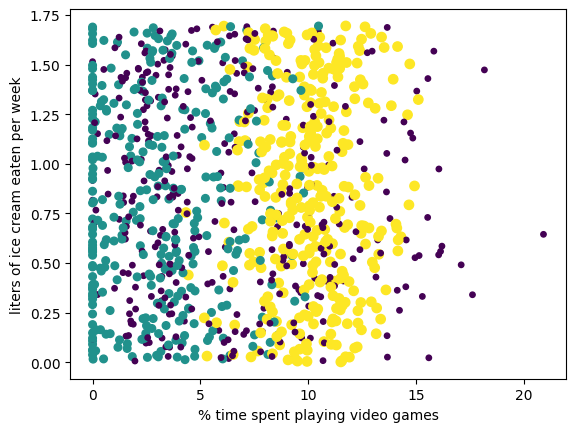

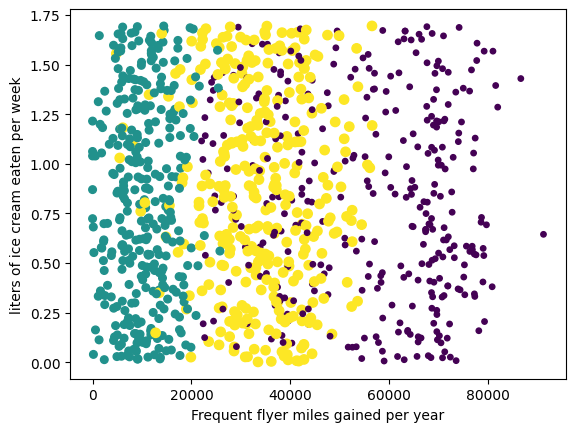

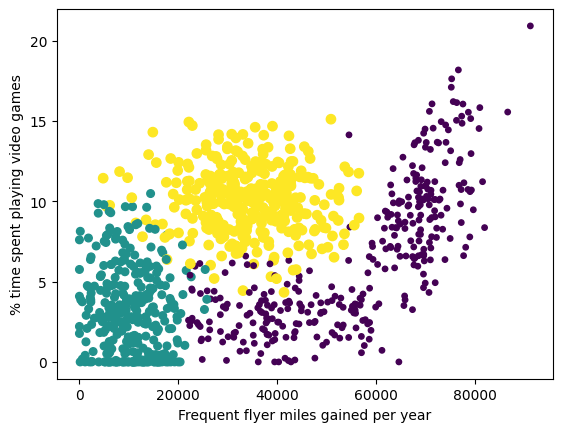

The classifier came back with: 3, the real answer is: 3
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe

In [21]:
datingClassTest()

In [22]:
classifyPerson()

Percentage of time spent playing video games?  5.2343
Frequent flier miles earned per year?  12034
Liters of ice cream consumed per year?  12.4


Predicted class: 2
You will probably like this person: in small doses
